In [74]:
not_pyplot = True
#import cc18_hyperparameter # main_functions
#from importlib import reload  
#cc18_hyperparameter = reload(cc18_hyperparameter)
#from cc18_hyperparameter import * 


In [76]:
from IPython.core.display import display, HTML

In [78]:
display(HTML("<style>.container { width:100% !important; }</style>"))
#%run create_params.ipynb

In [111]:
npy_path_main = r'C:\Users\noga mudrik\Documents\GitHub\df-dn-paper\benchmarks\tabular\results_cv_noga'
all_cv = npy_path_main + '\\test_perf_version1_gbdt.npy'#test_perf_version_all.npy'

In [116]:
test_perf0 = np.load(all_cv,allow_pickle=True).item()
results_different_datasets2 = {meth: np.vstack([pd.DataFrame(test_perf0[meth][i]).mean(0).values for i in range(len(test_perf0[meth]))])  for meth in test_perf0.keys()}

[Text(0, 0.5, 'test ACC'), Text(0, 0.5, 'test ACC'), Text(0, 0.5, 'test ACC')]

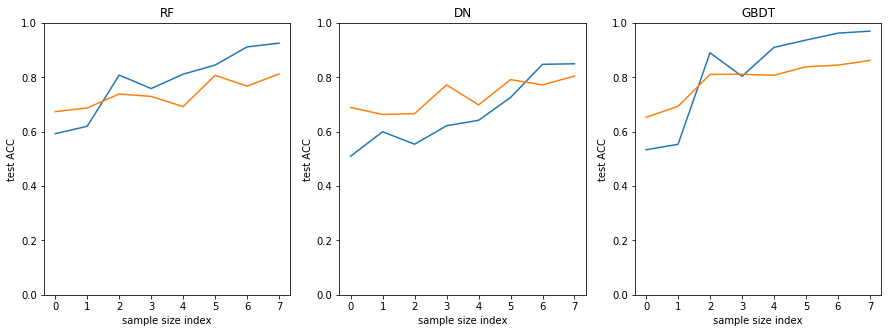

In [124]:
fig, axs = plt.subplots(1, len(results_different_datasets2), figsize = (5*len(results_different_datasets2),5))
keys_ord = list(results_different_datasets2.keys())
[axs[i].plot(results_different_datasets2[meth][[0,2]].T) for i, meth in enumerate(keys_ord)]
[ax.set_ylim([0,1]) for ax in axs]
[axs[i].set_title(meth) for i,meth in enumerate(keys_ord)]
[axs[i].set_xlabel('sample size index') for i,meth in enumerate(keys_ord)]
[ax.set_ylabel('test ACC') for ax in axs]

[Text(0.5, 1, 'RF'), Text(0.5, 1, 'DN'), Text(0.5, 1, 'GBDT')]

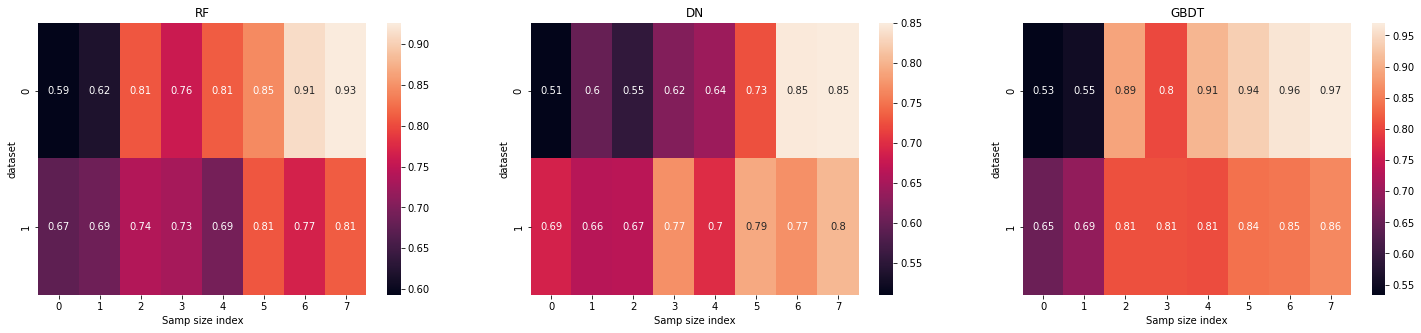

In [133]:
fig,axs = plt.subplots(1,3,figsize = (25,5))
import seaborn as sns
[sns.heatmap(pd.DataFrame(results_different_datasets2[meth][[0,2],:]), ax = axs[i],annot = True)  for i,meth in enumerate(keys_ord)]
[ax.set_xlabel('Samp size index') for ax in axs]
[ax.set_ylabel('dataset') for ax in axs]
[axs[i].set_title(meth) for i,meth in enumerate(keys_ord)]

In [102]:
"""
Coauthors: Michael Ainsworth
           Haoyin Xu
           Noga Mudrik
"""
# Imports

from sklearn.preprocessing import StandardScaler

from toolbox import *


# Define executrion variables (to save memory & execution time)
reload_data = False  # indicator of whether to upload the data again
return_default = False

#hyperparameters options

# general
dataset_indices_max = 2
max_shape_to_run = 1000 #0

# RF
criterions =['gini']# ['gini', 'entropy']# ['gini'] #
#max_features = ['sqrt','log2',0.5,0.8,1]
max_depth = [2, 10]# [1,3,10,None]
bootstrap = [True]#[True, False]
n_estimators_range  = [10]# [10,50,100,300]

# GBDT
eta = [0.1,0.2]# [0.1,0.3] #,0.7,0.9] #[0.1]# [0.1,0.3,0.7,0.9]
gamma = [0.3]#[0.3,0.2]# [0]#[0,0.2]
subsample = [0.7]# [0.5,0.7,1]#[0.5]# [0.5,0.7,1]
sampling_method = ['uniform']#['uniform','gradient_based']
colsample_bynode = [0.5]#[0.5,1]
lambda_vals = [0.2]# [0.2,0.6,1]
alpha_vals  =[0.2]#,0.6]## [0.2] #[0.2,0.6,1]

# TabNet
n_d = [8,9]#,20, 64]
n_a = [8]#,10]
gamma_tabnet =[1.3]# [1.3] #[1.3,3,8]
n_shared = [5]#[1,2,5]
#n_estimators_range = [20] #[20,100,200,500]
n_steps = [3] #[3, 5, 8, 10]
lambda_sparse = [0.1] #[0.1, 1e-2, 1e-3, 1e-4]
momentum = [0.01]#, 0.02]#, 0.05, 0.1, 0.4]

# Saving parameters
path_save = "metrics/cc18_all_parameters"
path_save_dict_data_indices = "metrics/dict_data_indices"
save_methods = {"text_dict": 0, "csv": 0, "json": 1}
save_methods_rewrite = {"text_dict": 0, "csv": 0, "json": 1}

if return_default:
    (
       
        dataset_indices_max,
        max_shape_to_run,
        models_to_run,
        subsample,
        ) = return_to_default()

"""
Models:
"""

"""
Change below to add a model
 
define which models to run
"""
models_to_run = {
    "RF": 1,
    "DN": 1,
    "GBDT": 1,
} 
models_to_scale = {
    "RF": 1,
    "DN": 1,
    "GBDT": 1,
} 
# models_to_scale = {
#     "RF": 0,
#     "DN": 1,
#     "GBDT": 0,
# } 
classifiers = {
    "DN": TabNetClassifier(),
    "RF": RandomForestClassifier(),
    "GBDT": xgb.XGBClassifier(booster="gbtree", base_score=0.5),
}


varargin = {
    "DN":
        {"n_d": n_d, "n_a": n_a, "gamma": gamma_tabnet,"n_shared": n_shared,'momentum': momentum,
         'lambda_sparse':lambda_sparse , 'n_steps':n_steps},
   "GBDT":
        { "subsample": subsample, 'alpha':alpha_vals,  'lambda': lambda_vals,
         'colsample_bynode':colsample_bynode, 'sampling_method':sampling_method,'gamma':gamma,'eta':eta}, 
    "RF":
        {'n_estimators':n_estimators_range, 'criterion':criterions,'max_depth':max_depth,'bootstrap':bootstrap}
}

varCV = {
    "DN": {"n_jobs": -1, "verbose": 1},
    "RF": {"n_jobs": -1, "verbose": 1},
    "GBDT": {"n_jobs": -1, "verbose": 1},
}

save_vars_to_dict(
    classifiers,
    varargin,
    reload_data = reload_data,
    dataset_indices_max = dataset_indices_max,
    max_shape_to_run = max_shape_to_run,
    subsample = subsample,
    path_to_save = "metrics/dict_parameters.json",
)


"""
function to save cc18_all_parameters file
Empty dict to record optimal parameters
"""

all_parameters = {
    model_name: {} for model_name, val in models_to_run.items() if val == 1
}
best_parameters = {
    model_name: {} for model_name, val in models_to_run.items() if val == 1
}
all_params = {model_name: {} for model_name, val in models_to_run.items() if val == 1}
test_perf = {model_name: {} for model_name, val in models_to_run.items() if val == 1}
#calc_times = {model_name: {}    for model_name in models_to_run.keys()
#}

calc_times = {model_name: {int(dataset_index): {} for dataset_index in np.arange(dataset_indices_max)}
    for model_name in models_to_run.keys()
}

"""
Organize the data
"""
# Load data from CC18 data set suite
if (
    reload_data or "dataset_name" not in locals()
):  # Load the data only if required (by reload_data or if it is not defined)
    X_data_list, y_data_list, dataset_name = load_cc18()

"""
Choose dataset indices
"""

dataset_indices = list(range(dataset_indices_max))
dict_data_indices = {dataset_ind: {} for dataset_ind in dataset_indices}
# ss_inds_full is a dictionary of the indices taken for different datasets
ss_inds_full = {} #{dataset_ind: None for dataset_ind in dataset_indices}


"""
For each dataset, use randomized hyperparameter search to optimize parameters
"""

for dataset_index, dataset in enumerate(dataset_indices):

    print("\n\nCurrent Dataset: ", dataset)

    X = X_data_list[dataset]
    y = y_data_list[dataset]

    """
    If data set has over 10000 samples, resample to contain 10000
    """

    if X.shape[0] > max_shape_to_run:
        X, y = sample_large_datasets(X, y, max_shape_to_run)

    """
    Split to train, val and test by ratio of 2:1:1
    """
    np.random.seed(dataset_index)
    dict_data_indices = find_indices_train_val_test(
        y, dict_data_indices=dict_data_indices, dataset_ind=dataset_index
    )
    train_indices = dict_data_indices[dataset_index]["train"]
    val_indices = dict_data_indices[dataset_index]["val"]


    p = X.shape[1]
    #ss_inds = random_sample_all[dataset]
    #random_sample_new( X_train, y_train, training_sample_sizes  )
    X_train = X[train_indices]
    y_train = y[train_indices]
    training_sample_sizes = np.geomspace(
        len(np.unique(y_train)) * 5, X_train.shape[0], num=8, dtype=int
    )
    ss_inds = random_sample_new(
        X_train, y_train, training_sample_sizes
    )
    ss_inds_full[dataset_index] = ss_inds
      #X_train_new = X_train[ss_inds[sample_size_index]]
        #ss_inds = random_sample_all[dataset]
    #random_sample_new(
    #    X_train, y_train, training_sample_sizes
    #)
    for sample_size_index, sample_size in enumerate(training_sample_sizes):
        print(np.array(ss_inds[sample_size_index], dtype = int))
        #print(train_indices)
        train_indices = np.array(train_indices)
        train_indices_pers = train_indices[np.array(ss_inds[sample_size_index] , dtype = int).astype(int)]
        
        for model_name, val_run in models_to_run.items():
            if val_run == 1:
                if model_name not in classifiers:
                    raise ValueError(
                        "Model name is not defined in the classifiers dictionary"
                    )
                else:
                    if models_to_scale[model_name ]:
                        """
                        Standart Scaling
                        """
                        scaler = StandardScaler()
                        scaler.fit(X)
                        X = scaler.transform(X)
                        
                    all_parameters, best_parameters, all_params,calc_time, test_perf = do_calcs_per_model(
                        all_parameters,
                        best_parameters,
                        all_params,
                        model_name,
                        varargin,
                        classifiers,
                        X,
                        y,
                        dataset_index,
                        train_indices_pers,
                        val_indices,
                        p,
                        varCV,
                        sample_size_index,
                        calc_test_perf = True,
                        test_perf = test_perf
                    )
                    # Store calculation time
                    calc_times[model_name][int(dataset_index)][int(sample_size_index)] = calc_time
                    print('size dict')
                    print(len(best_parameters[model_name]))
    save_best_parameters(save_methods, save_methods_rewrite, path_save, best_parameters)
    #save_best_parameters(save_methods, save_methods_rewrite, path_save, best_parameters)
    save_best_parameters(
        save_methods, save_methods_rewrite, path_save_dict_data_indices, dict_data_indices
    )
    save_best_parameters(
        save_methods, save_methods_rewrite, "metrics/varied_size_dict.json", ss_inds_full
    )
    save_best_parameters(
        save_methods, save_methods_rewrite, "metrics/tuning_times.json", calc_times
    )
    #save_best_parameters(
    #    save_methods, save_methods_rewrite, "metrics/tuning_times.json", test_perf
    #)
    np.save(r'metrics/test_perf_try.npy',test_perf)

Device used : cpu


Current Dataset:  0
[326  99 232 363 485 411 197  21 448  40]
Fitting 1 folds for each of 10 candidates, totalling 10 fits
dict_keys([])
size dict
1
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56417 |  0:00:00s
epoch 1  | loss: 1.33866 |  0:00:00s
epoch 2  | loss: 1.2189  |  0:00:00s
epoch 3  | loss: 1.13219 |  0:00:01s
epoch 4  | loss: 1.03823 |  0:00:01s
epoch 5  | loss: 0.9434  |  0:00:01s
epoch 6  | loss: 0.91935 |  0:00:01s
epoch 7  | loss: 0.79984 |  0:00:02s
epoch 8  | loss: 0.79574 |  0:00:02s
epoch 9  | loss: 0.76292 |  0:00:03s
epoch 10 | loss: 0.75979 |  0:00:03s
epoch 11 | loss: 0.75091 |  0:00:03s
epoch 12 | loss: 0.74849 |  0:00:04s
epoch 13 | loss: 0.74145 |  0:00:04s
epoch 14 | loss: 0.71785 |  0:00:04s
epoch 15 | loss: 0.71002 |  0:00:04s
epoch 16 | loss: 0.71337 |  0:00:05s
epoch 17 | loss: 0.6945  |  0:00:05s
epoch 18 | loss: 0.68089 |  0:00:05s
epoch 19 | loss: 0.67738 |  0:00:06s
epoch 20 | loss: 0.66225 |  0:00:06s
epoch 21 | loss: 0.66738 |  0:00:06s
epoch 22 | loss: 0.67067 |  0:00:07s
epoch 23 | loss: 0.63151 |  0:00:07s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([])
size dict
1
[459 180 152 185 364  84 180 331 185 151 352  44 142 135  21 311 234]
Fitting 1 folds for each of 10 candidates, totalling 10 fits
dict_keys([0])
size dict
1
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56418 |  0:00:00s
epoch 1  | loss: 1.33858 |  0:00:00s
epoch 2  | loss: 1.20266 |  0:00:01s
epoch 3  | loss: 1.11633 |  0:00:01s
epoch 4  | loss: 0.99202 |  0:00:01s
epoch 5  | loss: 0.90265 |  0:00:01s
epoch 6  | loss: 0.86078 |  0:00:01s
epoch 7  | loss: 0.81286 |  0:00:02s
epoch 8  | loss: 0.80317 |  0:00:02s
epoch 9  | loss: 0.79458 |  0:00:02s
epoch 10 | loss: 0.78235 |  0:00:03s
epoch 11 | loss: 0.76507 |  0:00:03s
epoch 12 | loss: 0.7533  |  0:00:03s
epoch 13 | loss: 0.74397 |  0:00:03s
epoch 14 | loss: 0.74701 |  0:00:04s
epoch 15 | loss: 0.7352  |  0:00:04s
epoch 16 | loss: 0.71842 |  0:00:04s
epoch 17 | loss: 0.69125 |  0:00:04s
epoch 18 | loss: 0.67804 |  0:00:05s
epoch 19 | loss: 0.67023 |  0:00:05s
epoch 20 | loss: 0.65089 |  0:00:05s
epoch 21 | loss: 0.634   |  0:00:05s
epoch 22 | loss: 0.61907 |  0:00:06s
epoch 23 | loss: 0.61305 |  0:00:06s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1
[461 373 207 334 461 279 279 350 245  70  69 380 463 286 313 348  50  62
 274 274 346 101 284  71 482  35 147 283 202  80]
Fitting 1 folds for each of 10 candidates, totalling 10 fits
dict_keys([0])
size dict
1
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56417 |  0:00:00s
epoch 1  | loss: 1.35046 |  0:00:00s
epoch 2  | loss: 1.16738 |  0:00:00s
epoch 3  | loss: 1.04717 |  0:00:00s
epoch 4  | loss: 0.97193 |  0:00:00s
epoch 5  | loss: 0.90837 |  0:00:01s
epoch 6  | loss: 0.85424 |  0:00:01s
epoch 7  | loss: 0.78382 |  0:00:01s
epoch 8  | loss: 0.77839 |  0:00:01s
epoch 9  | loss: 0.75087 |  0:00:01s
epoch 10 | loss: 0.75209 |  0:00:02s
epoch 11 | loss: 0.7516  |  0:00:02s
epoch 12 | loss: 0.74537 |  0:00:02s
epoch 13 | loss: 0.74818 |  0:00:02s
epoch 14 | loss: 0.71042 |  0:00:02s
epoch 15 | loss: 0.70059 |  0:00:02s
epoch 16 | loss: 0.68729 |  0:00:03s
epoch 17 | loss: 0.66293 |  0:00:03s
epoch 18 | loss: 0.64601 |  0:00:03s
epoch 19 | loss: 0.63413 |  0:00:03s
epoch 20 | loss: 0.61745 |  0:00:03s
epoch 21 | loss: 0.60471 |  0:00:04s
epoch 22 | loss: 0.60745 |  0:00:04s
epoch 23 | loss: 0.59699 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:53:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1
[ 69 495 121 235 172 188 207 116 239 175 381  99 245 253 340 270 280 433
 391 103 149 322 313 200 373 198 494 337  65 344  94 181 278 190  80 430
 223 481 312 422 272   0 291 226  81 399 272  42 400 277 250 190 114]
Fitting 1 folds for each of 10 candidates, totalling 10 fits
dict_keys([0])
size dict
1
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56418 |  0:00:00s
epoch 1  | loss: 1.35038 |  0:00:00s
epoch 2  | loss: 1.17006 |  0:00:00s
epoch 3  | loss: 1.05277 |  0:00:01s
epoch 4  | loss: 0.93417 |  0:00:01s
epoch 5  | loss: 0.855   |  0:00:01s
epoch 6  | loss: 0.81298 |  0:00:01s
epoch 7  | loss: 0.77526 |  0:00:01s
epoch 8  | loss: 0.75594 |  0:00:02s
epoch 9  | loss: 0.75424 |  0:00:02s
epoch 10 | loss: 0.74666 |  0:00:02s
epoch 11 | loss: 0.74591 |  0:00:02s
epoch 12 | loss: 0.75082 |  0:00:02s
epoch 13 | loss: 0.72713 |  0:00:03s
epoch 14 | loss: 0.723   |  0:00:03s
epoch 15 | loss: 0.71309 |  0:00:03s
epoch 16 | loss: 0.70884 |  0:00:03s
epoch 17 | loss: 0.6754  |  0:00:03s
epoch 18 | loss: 0.66461 |  0:00:04s
epoch 19 | loss: 0.66595 |  0:00:04s
epoch 20 | loss: 0.64215 |  0:00:04s
epoch 21 | loss: 0.62411 |  0:00:04s
epoch 22 | loss: 0.62137 |  0:00:04s
epoch 23 | loss: 0.58837 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1
[424 241 172 433 280 395 110  87 122 364  77 178  89  18 496 169  70 347
 247 331  88 349 165 243 496   6 198 432  45 200 472 340 498 449 264 178
 220 349  29 289 281 222  56 232 174 308 435 485 239 132 451  58  30 134
 392 320 147  79  36  76 387 439  25 353 221 181 276 470 246  83 456 266
  43 128 447   9 487 429 480  64 452 403 414 453  81  59  25 199 450 291
 387 488 352]
Fitting 1 folds for each of 10 candidates, totalling 10 fits
dict_keys([0])
size dict
1
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56418 |  0:00:00s
epoch 1  | loss: 1.33858 |  0:00:00s
epoch 2  | loss: 1.20266 |  0:00:00s
epoch 3  | loss: 1.11633 |  0:00:01s
epoch 4  | loss: 0.99202 |  0:00:01s
epoch 5  | loss: 0.90265 |  0:00:01s
epoch 6  | loss: 0.86078 |  0:00:01s
epoch 7  | loss: 0.81286 |  0:00:01s
epoch 8  | loss: 0.80317 |  0:00:02s
epoch 9  | loss: 0.79458 |  0:00:02s
epoch 10 | loss: 0.78235 |  0:00:02s
epoch 11 | loss: 0.76507 |  0:00:02s
epoch 12 | loss: 0.7533  |  0:00:02s
epoch 13 | loss: 0.74397 |  0:00:03s
epoch 14 | loss: 0.74701 |  0:00:03s
epoch 15 | loss: 0.7352  |  0:00:03s
epoch 16 | loss: 0.71842 |  0:00:03s
epoch 17 | loss: 0.69125 |  0:00:03s
epoch 18 | loss: 0.67804 |  0:00:04s
epoch 19 | loss: 0.67023 |  0:00:04s
epoch 20 | loss: 0.65089 |  0:00:04s
epoch 21 | loss: 0.634   |  0:00:04s
epoch 22 | loss: 0.61907 |  0:00:04s
epoch 23 | loss: 0.61305 |  0:00:05s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1
[243 300 225 496  60 415 286 331 280  66 146  74 156 417 497  60 376 131
  91 185  72 255 440 492  77 494 373 491 169 261 357 251 395 321 333  56
 229  66 458 275 423   4 149  91 490 225 188  84 282 273 374  89 174 196
 331 379  63 395 215 138  29 216 314 198  55 231 360 371 261 196 454 180
 307 279 155 180  23 170 237 381 421  52 433 174 260 420 112 294  12   0
 288 439 439 386 292  10 354 179 368  47 137 100 499 377 465  97 477 202
  36 238  62  97 336 386 108 365 104  36 368 163 409 132 487 101  94 182
 109 150 327 258 345 108 377 204 422  83  30 250 132  71 354 288  30 287
 444  41 147 460  20 477  15 446 419 450 460 410 111 303 105 226 493 317
  43]


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.33914 |  0:00:00s
epoch 1  | loss: 1.0747  |  0:00:00s
epoch 2  | loss: 0.95074 |  0:00:00s
epoch 3  | loss: 0.86436 |  0:00:00s
epoch 4  | loss: 0.83964 |  0:00:01s
epoch 5  | loss: 0.81645 |  0:00:01s
epoch 6  | loss: 0.82256 |  0:00:01s
epoch 7  | loss: 0.81485 |  0:00:01s
epoch 8  | loss: 0.79496 |  0:00:01s
epoch 9  | loss: 0.77296 |  0:00:02s
epoch 10 | loss: 0.76388 |  0:00:02s
epoch 11 | loss: 0.75093 |  0:00:02s
epoch 12 | loss: 0.74199 |  0:00:02s
epoch 13 | loss: 0.73875 |  0:00:02s
epoch 14 | loss: 0.7308  |  0:00:03s
epoch 15 | loss: 0.72481 |  0:00:03s
epoch 16 | loss: 0.71535 |  0:00:03s
epoch 17 | loss: 0.69685 |  0:00:03s
epoch 18 | loss: 0.68365 |  0:00:04s
epoch 19 | loss: 0.67143 |  0:00:04s
epoch 20 | loss: 0.67022 |  0:00:04s
epoch 21 | loss: 0.653   |  0:00:04s
epoch 22 | loss: 0.65702 |  0:00:05s
epoch 23 | loss: 0.65829 |  0:00:05s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1
[  7 208  67 117 295 350  66 235  13 215 262 347 395 280 497 244 144  46
 227 263 449  89 138 188 225 432 431 253 435 247  55 351 259   6 432 321
  57 426 472 379 373 260 243 198 155 469 260 371 401 219 212 174 425 494
 255 217  13 281 324  98   1 339  82 186 158 432 241 201 389  70 230 337
 330 441 254 196 366 350 314 359   7 388 432 156 417  57  52 391 187 113
 393 131 214 247 198  11 330 464  27 322 318 172 421 322 229 436 418 469
 208 423 337 331 196 229 308 426 441 145 243 263 227 417 299 349 237 373
   6 356 454 315 324 397 152 280 230 195 212 373 220 208 347 305 170  74
 449 461 483 491  48 368 479 452 303 325 499 248 352 272 276 284 416 293
 173 1

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56417 |  0:00:00s
epoch 1  | loss: 1.35046 |  0:00:00s
epoch 2  | loss: 1.16738 |  0:00:00s
epoch 3  | loss: 1.04717 |  0:00:00s
epoch 4  | loss: 0.97193 |  0:00:01s
epoch 5  | loss: 0.90837 |  0:00:01s
epoch 6  | loss: 0.85424 |  0:00:01s
epoch 7  | loss: 0.78382 |  0:00:01s
epoch 8  | loss: 0.77839 |  0:00:01s
epoch 9  | loss: 0.75087 |  0:00:01s
epoch 10 | loss: 0.75209 |  0:00:02s
epoch 11 | loss: 0.7516  |  0:00:02s
epoch 12 | loss: 0.74537 |  0:00:02s
epoch 13 | loss: 0.74818 |  0:00:02s
epoch 14 | loss: 0.71042 |  0:00:02s
epoch 15 | loss: 0.70059 |  0:00:03s
epoch 16 | loss: 0.68729 |  0:00:03s
epoch 17 | loss: 0.66293 |  0:00:03s
epoch 18 | loss: 0.64601 |  0:00:03s
epoch 19 | loss: 0.63413 |  0:00:03s
epoch 20 | loss: 0.61745 |  0:00:04s
epoch 21 | loss: 0.60471 |  0:00:04s
epoch 22 | loss: 0.60745 |  0:00:04s
epoch 23 | loss: 0.59699 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1
[207 415 396 424 300 155  84 442 241 289 275 371 326 397   1 263 371 418
 309 110 459  46 324 233 247 215 366 431 265 233  72 286  82 495  11 212
 337 496 301  16 230 231 343 443 364 168 133  99 164 281 237  23 424 195
 445 215 401  11 208 103  85 302 270  78 125 228 200 393 133 196 282 174
 245 298 458 174 260 340 169   1 406 391 486 253 131 271 175 231 436 492
 103 273  16 359 168 437 389 435  13 302 469 169 299  99 229  18 187 117
 313 153 227 148  23 211 395 373 208 490 301 437 282  67 492  45 498 280
 158 241 404 436 483 196 322  85 356 395 339 125  66 431 198 454 315 412
 319 301 144 378 180 415 259 412 211  89 222 455  18 235 103 376 455 347
 201 1

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.56418 |  0:00:00s
epoch 1  | loss: 1.35038 |  0:00:00s
epoch 2  | loss: 1.17006 |  0:00:00s
epoch 3  | loss: 1.05277 |  0:00:00s
epoch 4  | loss: 0.93417 |  0:00:01s
epoch 5  | loss: 0.855   |  0:00:01s
epoch 6  | loss: 0.81298 |  0:00:01s
epoch 7  | loss: 0.77526 |  0:00:01s
epoch 8  | loss: 0.75594 |  0:00:01s
epoch 9  | loss: 0.75424 |  0:00:02s
epoch 10 | loss: 0.74666 |  0:00:02s
epoch 11 | loss: 0.74591 |  0:00:02s
epoch 12 | loss: 0.75082 |  0:00:02s
epoch 13 | loss: 0.72713 |  0:00:02s
epoch 14 | loss: 0.723   |  0:00:03s
epoch 15 | loss: 0.71309 |  0:00:03s
epoch 16 | loss: 0.70884 |  0:00:03s
epoch 17 | loss: 0.6754  |  0:00:03s
epoch 18 | loss: 0.66461 |  0:00:03s
epoch 19 | loss: 0.66595 |  0:00:04s
epoch 20 | loss: 0.64215 |  0:00:04s
epoch 21 | loss: 0.

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
1


Current Dataset:  1
[332 444   7  53  53 196 299 487 149 175 402  33  96 122 436 475  70 364
 217 265 452 121 372 372  79 491  97 479 365 148  41  55 249  41 284  93
 316 451  61  23  40 158 161 189 278 446 320 105 162 164  43  43 211 253
 107 104 371 399 485   3 426 139 411 343 389 106 198 106 288  45 339 150
 268 393 395  46 331 305 401 414 152 232 115  24 152   4 453 462 156 135
 387 138 137 287 336 460 220 245   0 292 427 272  51  51  65  71 439 312
  71 412 489 342 229 113 154 304 374 267 374 100 437   1   1 301 416 208
 169 360  49  64]
Fitting 1 folds for each of 8 candidates, totalling 8 fits


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


dict_keys([0])
size dict
2
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.11568 |  0:00:00s
epoch 1  | loss: 3.76387 |  0:00:00s
epoch 2  | loss: 3.61333 |  0:00:00s
epoch 3  | loss: 3.50328 |  0:00:00s
epoch 4  | loss: 3.46888 |  0:00:00s
epoch 5  | loss: 3.41225 |  0:00:01s
epoch 6  | loss: 3.33372 |  0:00:01s
epoch 7  | loss: 3.32441 |  0:00:01s
epoch 8  | loss: 3.25514 |  0:00:01s
epoch 9  | loss: 3.21592 |  0:00:01s
epoch 10 | loss: 3.1908  |  0:00:02s
epoch 11 | loss: 3.14433 |  0:00:02s
epoch 12 | loss: 3.11469 |  0:00:02s
epoch 13 | loss: 3.09401 |  0:00:02s
epoch 14 | loss: 3.04333 |  0:00:02s
epoch 15 | loss: 3.03845 |  0:00:02s
epoch 16 | loss: 3.01453 |  0:00:03s
epoch 17 | loss: 2.97469 |  0:00:03s
epoch 18 | loss: 2.92066 |  0:00:03s
epoch 19 | loss: 2.88934 |  0:00:03s
epoch 20 | loss: 2.87554 |  0:00:03s
epoch 21 | loss: 2.85366 |  0:00:04s
epoch 22 | loss: 2.8374  |  0:00:04s
epoch 23 | loss: 2.7981  |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0])
size dict
2
[ 30 330 346 455 174 174 226  88 147 318 349  11  73  72 423 254 423 423
 327 447 376 447 497  31 180  79  99 155 337 159 404 194 491 176 404 298
 187 381  55 324  90 449 432  93 311 326 109  93 161 338  40 338 278 334
 184 128 320 146  76 314 107 107 211 253 253 253  59 399 485 379  59 188
 343 415 233 233  67 411  22  22  19 193 218 106  14 308  60 179 419 268
  17 414 401  46 202  54 390 115 195 115 465 405 117 462 453 135 178 178
 313 313 137 386 257 257 323 466 183 220 467 323 473 421 244 370 244 427
   9 238 264 412 238  12 384 230 154 143 225 342  57 267 221 400 448   6
 374 224   1 380 416 456 224  64 157 169 360 102   8]
Fitting 1 folds for each

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.08254 |  0:00:00s
epoch 1  | loss: 3.89087 |  0:00:00s
epoch 2  | loss: 3.73163 |  0:00:00s
epoch 3  | loss: 3.59645 |  0:00:00s
epoch 4  | loss: 3.49553 |  0:00:00s
epoch 5  | loss: 3.43915 |  0:00:01s
epoch 6  | loss: 3.38486 |  0:00:01s
epoch 7  | loss: 3.35646 |  0:00:01s
epoch 8  | loss: 3.32296 |  0:00:01s
epoch 9  | loss: 3.33859 |  0:00:01s
epoch 10 | loss: 3.28937 |  0:00:02s
epoch 11 | loss: 3.24893 |  0:00:02s
epoch 12 | loss: 3.23621 |  0:00:02s
epoch 13 | loss: 3.21303 |  0:00:02s
epoch 14 | loss: 3.19666 |  0:00:02s
epoch 15 | loss: 3.18499 |  0:00:02s
epoch 16 | loss: 3.1532  |  0:00:03s
epoch 17 | loss: 3.12717 |  0:00:03s
epoch 18 | loss: 3.11619 |  0:00:03s
epoch 19 | loss: 3.09796 |  0:00:03s
epoch 20 | loss: 3.05982 |  0:00:03s
epoch 21 | loss: 3.04554 |  0:00:04s
epoch 22 | loss: 3.01569 |  0:00:04s
epoch 23 | loss: 2.99152 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2
[174 444 444 330  66 170 346 306 349 438 147 299 487  88 254 493 423  33
  96 250 480 447  56 475 281 265 340 364 101 155 159 180 337 159 452 372
 176  97 136 479 148  78 463 449 367 124 124 324 418  55 108  32 144 246
 442 246  23 158 469 461 103 334  85 158 105 443 443 320 164 296 146 354
 181 253 471 107 398 495 464 256  37  21 371  59 379 186  67 474  20 233
 186 139 192 198  45  22 218  19 106   5 368 274 179  29 235 268 235  46
 297  46  91 127 478  13  81 279 232 195 152 215 279 341   4 207 190 241
 135   4 344  63 248 111 313 499 336 276  87 466  50  39 345 417  87 245
 112 421 427 322 322  51  65 244 277 328  44 201 312 384 328 225  57 230
 2

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.11568 |  0:00:00s
epoch 1  | loss: 3.76387 |  0:00:00s
epoch 2  | loss: 3.61333 |  0:00:00s
epoch 3  | loss: 3.50315 |  0:00:00s
epoch 4  | loss: 3.4661  |  0:00:01s
epoch 5  | loss: 3.44063 |  0:00:01s
epoch 6  | loss: 3.36342 |  0:00:01s
epoch 7  | loss: 3.32521 |  0:00:01s
epoch 8  | loss: 3.25905 |  0:00:01s
epoch 9  | loss: 3.24787 |  0:00:02s
epoch 10 | loss: 3.19965 |  0:00:02s
epoch 11 | loss: 3.1799  |  0:00:02s
epoch 12 | loss: 3.1392  |  0:00:02s
epoch 13 | loss: 3.11574 |  0:00:02s
epoch 14 | loss: 3.08006 |  0:00:02s
epoch 15 | loss: 3.04699 |  0:00:03s
epoch 16 | loss: 3.01982 |  0:00:03s
epoch 17 | loss: 2.99181 |  0:00:03s
epoch 18 | loss: 2.96377 |  0:00:03s
epoch 19 | loss: 2.93844 |  0:00:03s
epoch 20 | loss: 2.9085  |  0:00:04s
epoch 21 | loss: 2.88515 |  0:00:04s
epoch 22 | loss: 2.87324 |  0:00:04s
epoch 23 | loss: 2.84704 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2
[455  30 174 329 455  15   7 140  30 359 147 349 172 315 175 175 175  88
  96  89  89 423 145  73 423 484  72 364 497 217 364  70 447 376  70  31
 121 155 303 222 351 180 159 337 121 404 255  97 255 491  97 365 491 129
 124 418 160  90 160 247 124 418  55 451  32 373 442 144 316 373 433  32
 469 357 361  40  86 361 488 338 319 314  36 271 162 498 105 133  94 443
 398 171 406 472 406 495 490 211 490 399  59 256 256  21 422 256 485 422
  98 214 335  98 411 335 186 186 335 242 269 218  19 193 206   5  19  45
 477 477 268 477 235 302 477 118 339 478 305  13 237  46  91  46  91 478
  52 465 465 177 279  24 131 286 232 135 117 270 355 117 270 178 190 117
 2

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.11568 |  0:00:00s
epoch 1  | loss: 3.76387 |  0:00:00s
epoch 2  | loss: 3.61329 |  0:00:00s
epoch 3  | loss: 3.50209 |  0:00:00s
epoch 4  | loss: 3.46802 |  0:00:01s
epoch 5  | loss: 3.42033 |  0:00:01s
epoch 6  | loss: 3.35176 |  0:00:01s
epoch 7  | loss: 3.33175 |  0:00:01s
epoch 8  | loss: 3.27812 |  0:00:01s
epoch 9  | loss: 3.23073 |  0:00:01s
epoch 10 | loss: 3.20428 |  0:00:02s
epoch 11 | loss: 3.184   |  0:00:02s
epoch 12 | loss: 3.15744 |  0:00:02s
epoch 13 | loss: 3.12021 |  0:00:02s
epoch 14 | loss: 3.087   |  0:00:02s
epoch 15 | loss: 3.07337 |  0:00:03s
epoch 16 | loss: 3.03345 |  0:00:03s
epoch 17 | loss: 2.99873 |  0:00:03s
epoch 18 | loss: 2.97691 |  0:00:03s
epoch 19 | loss: 2.95022 |  0:00:03s
epoch 20 | loss: 2.91138 |  0:00:04s
epoch 21 | loss: 2.89216 |  0:00:04s
epoch 22 | loss: 2.86453 |  0:00:04s
epoch 23 | loss: 2.85384 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2
[ 66 170 434 170  30 455 444 444 470 330 434 196  88 438 147 196 348 409
 172 149 348 172 254 125   2 484  89  73  33  89 480  96 125 497  62 281
 281  56  70 265 217 475 497 217 222  83 351 121 452  92 159  83 180  79
 121 404 136 404 129 194 479 463 463 298 365 129 381 367 307 307  55 197
 408 197 381  41 124 451  61 163 311 108 109 109  95  32  95 108 161 189
 103 469 407 488 319 158 469  86 103 296 184 296 105 446 132 320  76 164
 446 128 120 120 471  80 354  80  43 440 472 354  43  21 388 104 388 104
 422  59 399  37  82 110 457 426 139 233 233 496 214 496 474 389 139 280
 106 198 262 282 394 269  45 193 206 282 308 274 308 419 235  29 477  14
 2

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


dict_keys([0, 1])
size dict
2
Device used : cpu
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Device used : cpu
Device used : cpu


C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.08254 |  0:00:00s
epoch 1  | loss: 3.89087 |  0:00:00s
epoch 2  | loss: 3.73097 |  0:00:00s
epoch 3  | loss: 3.60099 |  0:00:00s
epoch 4  | loss: 3.47775 |  0:00:01s
epoch 5  | loss: 3.44209 |  0:00:01s
epoch 6  | loss: 3.40982 |  0:00:01s
epoch 7  | loss: 3.35314 |  0:00:01s
epoch 8  | loss: 3.30226 |  0:00:01s
epoch 9  | loss: 3.27139 |  0:00:02s
epoch 10 | loss: 3.26807 |  0:00:02s
epoch 11 | loss: 3.25267 |  0:00:02s
epoch 12 | loss: 3.25135 |  0:00:02s
epoch 13 | loss: 3.23008 |  0:00:02s
epoch 14 | loss: 3.20075 |  0:00:02s
epoch 15 | loss: 3.18977 |  0:00:03s
epoch 16 | loss: 3.1805  |  0:00:03s
epoch 17 | loss: 3.13738 |  0:00:03s
epoch 18 | loss: 3.09629 |  0:00:03s
epoch 19 | loss: 3.09702 |  0:00:03s
epoch 20 | loss: 3.04115 |  0:00:03s
epoch 21 | loss: 3.03461 |  0:00:04s
epoch 22 | loss: 2.99927 |  0:00:04s
epoch 23 | loss: 2.98395 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2
[166   7 468 140 434 174  30 468 444 455 174 332 170 318  11 315 315 226
  11 348 348 172 359 196 487 149 436 402  89 480  73 145  73 480 493  89
 436  72 480  10 475 265 481  31 447 475 340 101 497  62  56 101  62 494
 155 303  92 351 482  92  92  83  99 159 222 222 479 491 463  16 126  78
 317  27  78  78 300 148 317 418 324 418  41  55 124 284 284  41  77  55
 367 381 442  95 144 109 246 432 451 311 451  61 442  93 433 357 103 358
  86 103 469 357 189 334 334 161 334 278 320 105 128  94 133 320 320 164
 296 133 128 133 498 211  34 398 211 227 471 120 310 472 227 472 440  34
 420 379  37 388  37 464 388 422  82 110  21 464  37  67 186 273 483  67
 1

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.11568 |  0:00:00s
epoch 1  | loss: 3.76387 |  0:00:00s
epoch 2  | loss: 3.61336 |  0:00:00s
epoch 3  | loss: 3.50114 |  0:00:00s
epoch 4  | loss: 3.49802 |  0:00:00s
epoch 5  | loss: 3.37757 |  0:00:01s
epoch 6  | loss: 3.2797  |  0:00:01s
epoch 7  | loss: 3.28404 |  0:00:01s
epoch 8  | loss: 3.27614 |  0:00:01s
epoch 9  | loss: 3.2225  |  0:00:02s
epoch 10 | loss: 3.17196 |  0:00:02s
epoch 11 | loss: 3.14139 |  0:00:02s
epoch 12 | loss: 3.10355 |  0:00:02s
epoch 13 | loss: 3.08911 |  0:00:02s
epoch 14 | loss: 3.05281 |  0:00:02s
epoch 15 | loss: 3.03685 |  0:00:03s
epoch 16 | loss: 2.99224 |  0:00:03s
epoch 17 | loss: 2.97159 |  0:00:03s
epoch 18 | loss: 2.93489 |  0:00:03s
epoch 19 | loss: 2.90197 |  0:00:04s
epoch 20 | loss: 2.8488  |  0:00:04s
epoch 21 | loss: 2.82832 |  0:00:04s
epoch 22 | loss: 2.8046  |  0:00:04s
epoch 23 | loss: 2.8085  |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2
[434 346 332 140 174 174 444 329 329 468   7 170 166  30  15 455 348 438
 196  68  88  11 487 175 175 147 149 487 175 349 359 438  33 145 484 254
   2  72  73 450  89  73 145 480 480  89   2  72 217 265 281 101 340 327
  48 475 130 130 101  70 265 340 217  31 351 337 372  99  84 159 337 180
 121 159 372 372 182 182 243  92 148 491 176  27  97 491 479 365 255 255
 298 317 365 129 255 148 418 160 187 307 307 418 449 160 418 247 418 284
 197 307 369  41  32  32  95 326 163 451 326  93 311 144 373 163 373  93
  93 442 357 358 266 407 361 266 334 358 488  85 338 488 361 161 278 488
  76 184 271 184 146 105 446 271 446 164 443 164 184  76 164 271 490 211
 4

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.08254 |  0:00:00s
epoch 1  | loss: 3.89087 |  0:00:00s
epoch 2  | loss: 3.73101 |  0:00:00s
epoch 3  | loss: 3.62157 |  0:00:00s
epoch 4  | loss: 3.4771  |  0:00:00s
epoch 5  | loss: 3.4082  |  0:00:01s
epoch 6  | loss: 3.35424 |  0:00:01s
epoch 7  | loss: 3.31362 |  0:00:01s
epoch 8  | loss: 3.29947 |  0:00:01s
epoch 9  | loss: 3.25585 |  0:00:01s
epoch 10 | loss: 3.23087 |  0:00:01s
epoch 11 | loss: 3.19692 |  0:00:02s
epoch 12 | loss: 3.17255 |  0:00:02s
epoch 13 | loss: 3.15721 |  0:00:02s
epoch 14 | loss: 3.14316 |  0:00:02s
epoch 15 | loss: 3.13593 |  0:00:02s
epoch 16 | loss: 3.11259 |  0:00:03s
epoch 17 | loss: 3.08017 |  0:00:03s
epoch 18 | loss: 3.05758 |  0:00:03s
epoch 19 | loss: 3.05069 |  0:00:03s
epoch 20 | loss: 3.00689 |  0:00:04s
epoch 21 | loss: 3.00176 |  0:00:04s
epoch 22 | loss: 2.97824 |  0:00:04s
epoch 23 | loss: 2.95629 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2
[329 468 330 468 174  53 455 330 470 444  53  66 170  53 330 444 346 444
  15 315 172 149  11 172 315 348 196 226 315  68 349 175 315 306  11 487
 226 175 254  72  73  73 484 450 125 145 493 484 122  72 145 450 480 122
  72 122 125  70  70  31 376 101 475 217  31  48 447  48 327 281  62 376
 130  70 376 481 376 372  79 155 182  83 243 155 180  99 303  92 121 303
 494  79  83 337 452 243 365 317 176  97 194 479 129 298 317 194 317 317
 463 479 317 148 479 126 298 381 247 187 197 307 160 418 249  41 187 197
 449 187  90 160 249 160 408 187 316 442 144 451 311 109  95 144 432 347
  93 109 316 144 316 433  95 451 316  86 461 319 161 278 469 461 357 161
 4

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.11568 |  0:00:00s
epoch 1  | loss: 3.76387 |  0:00:00s
epoch 2  | loss: 3.61329 |  0:00:00s
epoch 3  | loss: 3.50212 |  0:00:00s
epoch 4  | loss: 3.4685  |  0:00:00s
epoch 5  | loss: 3.40701 |  0:00:01s
epoch 6  | loss: 3.33677 |  0:00:01s
epoch 7  | loss: 3.31378 |  0:00:01s
epoch 8  | loss: 3.2773  |  0:00:01s
epoch 9  | loss: 3.23855 |  0:00:02s
epoch 10 | loss: 3.22026 |  0:00:02s
epoch 11 | loss: 3.20876 |  0:00:02s
epoch 12 | loss: 3.18701 |  0:00:02s
epoch 13 | loss: 3.15937 |  0:00:02s
epoch 14 | loss: 3.11315 |  0:00:02s
epoch 15 | loss: 3.08296 |  0:00:03s
epoch 16 | loss: 3.06545 |  0:00:03s
epoch 17 | loss: 3.0484  |  0:00:03s
epoch 18 | loss: 3.00086 |  0:00:03s
epoch 19 | loss: 2.98119 |  0:00:03s
epoch 20 | loss: 2.95491 |  0:00:04s
epoch 21 | loss: 2.93475 |  0:00:04s
epoch 22 | loss: 2.90845 |  0:00:04s
epoch 23 | loss: 2.91045 |  0:00:04s
epo

C:\Users\noga mudrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dict_keys([0, 1])
size dict
2


In [57]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('notebook', {'highlight_selected_word': {
    'delay': 500,
    'code_cells_only': False,
}})

{'Notebook': {'Header': True},
 'Cell': {'cm_config': {'lineNumbers': True}},
 'highlight_selected_word': {'delay': 500, 'code_cells_only': False}}

In [103]:
"""
Coauthors: Michael Ainsworth
           Jayanta Dey
           Haoyin Xu
           Noga Mudrik
"""

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import time
from toolbox import *

"""
Parameters
"""

num_classes = 10
reload_data = False  # indicator of whether to upload the data again

path_save = "metrics/cc18_all_parameters"
path_params = "metrics/dict_parameters"
path_train_val_test_indices = "metrics/dict_data_indices"
#with open(path_params + ".json", "r") as json_file:
#    dictionary_params = json.load(json_file)
f = open('metrics/dict_parameters.json');
dictionary_params = json.load(f)

f2 = open(path_train_val_test_indices + ".json")
dict_data_indices = json.load(f2)

f3 = open("metrics/varied_size_dict.json") #varied size are final indices for each model. it is dict -> dataset -> index sampline -> list
ss_inds_full = json.load(f3)

models_to_scale = {
    "RF": 1,
    "DN": 1,
    "GBDT": 1,
} 


#f3 = open(ss_inds_path + ".json")
#dict_data_indices = json.load(f2)
#with open(path_train_val_test_indices + ".json", "r") as json_file:
#    dict_data_indices = json.load(json_file)

path = path_save  # "metrics/cc18_all_parameters"
type_file = ".json"
dataset_indices_max = dictionary_params["dataset_indices_max"]
max_shape_to_run = dictionary_params["max_shape_to_run"]
file_type_to_load = ".json"

"""
Number of repetitions for each CV fold at each sample size
"""

reps = 1
shape_2_all_sample_sizes = dictionary_params["shape_2_all_sample_sizes"]
shape_2_evolution = dictionary_params["shape_2_evolution"]
n_splits = dictionary_params["shape_2_evolution"]

models_to_run = {"RF": 1, "DN": 1, "GBDT": 1}


"""
Import CC18 data and pretuned hyperparameters
"""

if reload_data or "dataset_name" not in locals():
    X_data_list, y_data_list, dataset_name = load_cc18()

"""
Upload best parameters
"""

#if "best_params_dict" not in locals():
f_best        = open(path+".json")
best_params_dict = json.load(f_best)

train_indices = [i for i in range(dataset_indices_max)]

"""
Create empty arrays to index sample sizes, kappa values, and ece scores
"""

all_sample_sizes = np.zeros((dataset_indices_max, shape_2_all_sample_sizes))

"""
Empty arrays to index times into
"""

train_times = {
    model_name: None for model_name in dictionary_params["classifiers_names"]
}
test_times = {model_name: None for model_name in dictionary_params["classifiers_names"]}

train_test_times = {model_name: {} for model_name in best_params_dict.keys()}
#train_test_times = {
    #metric: {model_name: {} for model_name in best_params_dict.keys()}
    #for metric in ["cohen_kappa", "ece"]
#}


evolution_dict = {
    metric: {model_name: {} for model_name in best_params_dict.keys()}
    for metric in ["cohen_kappa", "ece"]
}

"""
For each dataset, train and predict for every sample size
Record outputs using Cohen's Kappa and ECE
"""

for dataset_index, dataset in enumerate(train_indices):
    print("\n\nCurrent Dataset: ", dataset)

    X = X_data_list[dataset]
    y = y_data_list[dataset]
    
        # If data set has over 10000 samples, resample to contain 10000
    if X.shape[0] > max_shape_to_run:
        X, y = sample_large_datasets(X, y, max_shape_to_run)
        
    train_indices = dict_data_indices[str(dataset_index)]["train"]
    test_indices = dict_data_indices[str(dataset_index)]["test"]

    #take train test
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    training_sample_sizes = np.geomspace(        len(np.unique(y_train)) * 5, X_train.shape[0], num=8, dtype=int    )

    #ss_inds = random_sample_all[dataset]
    #random_sample_new(
    #    X_train, y_train, training_sample_sizes
    #)

    # Iterate through each sample size per dataset
    try:
        ss_inds = ss_inds_full[dataset_index]
    except:
        ss_inds = ss_inds_full[str(dataset_index)]
    for sample_size_index, real_sample_size in enumerate(training_sample_sizes):
        real_sample_size  = int(real_sample_size)
        cohen_ece_results_dict = {metric: {} for metric in ["cohen_kappa", "ece"]}
        train_test_times_cur = {
            model_name: np.zeros((reps)) for model_name in best_params_dict.keys()        }
        
        X_train_new = X_train[np.array(ss_inds[sample_size_index]).astype(int)]
        y_train_new = y_train[np.array(ss_inds[sample_size_index]).astype(int)]

        # Repeat for number of repetitions, averaging results
        for model_name, model_best_params in best_params_dict.items():
            if models_to_run[model_name]:
                if models_to_scale[model_name ]:
                    scaler = StandardScaler()
                    scaler.fit(X_train_new)
                    X_train_new = scaler.transform(X_train_new)
                    X_test_new = scaler.transform(X_test)
                else:
                    X_test_new = X_test
                    
                if dataset not in train_test_times[model_name].keys():
                    train_test_times[model_name][dataset] = {}
                    train_test_times[model_name][dataset] = {}

                try:
                    model = model_define(model_name, best_params_dict, dataset_index, sample_size_index)

                    start_time = time.perf_counter()
                    model.fit(X_train_new, y_train_new)
                    end_time = time.perf_counter()
                    train_time = end_time - start_time

                    predictions = model.predict(X_test_new)
                    predict_probas = model.predict_proba(X_test_new)

                    cohen_kappa = cohen_kappa_score(y_test, predictions)
                    cohen_ece_results_dict["cohen_kappa"][model_name] = cohen_kappa
                    ece = get_ece(predict_probas, predictions, y_test)
                    cohen_ece_results_dict["ece"][model_name] = ece

                    train_test_times_cur[model_name] = train_time

                except ValueError:
                    print(model_name)

                if dataset not in evolution_dict["cohen_kappa"][model_name].keys():
                    evolution_dict["cohen_kappa"][model_name][dataset] = {}
                    evolution_dict["ece"][model_name][dataset] = {}
                if (
                    real_sample_size
                    not in evolution_dict["cohen_kappa"][model_name][dataset].keys()      ):
                    evolution_dict["cohen_kappa"][model_name][dataset][  real_sample_size        ] = []
                    evolution_dict["ece"][model_name][dataset][real_sample_size] = []
                    train_test_times[model_name][dataset][real_sample_size] = []
                    train_test_times[model_name][dataset][real_sample_size] = []

                evolution_dict["cohen_kappa"][model_name][dataset][
                    real_sample_size           ].append(cohen_ece_results_dict["cohen_kappa"][model_name])
                
                evolution_dict["ece"][model_name][dataset][real_sample_size].append(  cohen_ece_results_dict["ece"][model_name]              )
                train_test_times[model_name][dataset][real_sample_size].append(
                    train_test_times_cur[model_name]             )

                # Changing the results to tuple enabling easier saving to json and ectacting the fata after that.

                train_test_times[model_name][dataset][real_sample_size] = tuple( train_test_times[model_name][dataset][real_sample_size]               )

                evolution_dict["cohen_kappa"][model_name][dataset][real_sample_size] = tuple(evolution_dict["cohen_kappa"][model_name][dataset][real_sample_size]  )

                evolution_dict["ece"][model_name][dataset][real_sample_size] = tuple(evolution_dict["ece"][model_name][dataset][real_sample_size] )

    # Record sample sizes used
    all_sample_sizes[dataset_index][:] = np.array(training_sample_sizes)

new_dict = {}
for key_met in evolution_dict.keys():
    new_dict[key_met] = mod_dict(evolution_dict[key_met], tuple)
#new_dict_times = mod_dict(train_test_times, tuple)


"""
Save sample sizes and model results in json files
"""


save_methods = {"json": 1}
save_methods_rewrite = {"json": 1}
save_best_parameters(   save_methods,   save_methods_rewrite,   "metrics/cc18_sample_sizes.json",
                     all_sample_sizes.tolist())

save_best_parameters(  save_methods, save_methods_rewrite, "results/cc18_kappa_and_ece", new_dict)
save_best_parameters( save_methods, save_methods_rewrite, "results/cc18_training_times", train_test_times)





Current Dataset:  0
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.69841 |  0:00:00s
epoch 1  | loss: 1.58838 |  0:00:00s
epoch 2  | loss: 1.05612 |  0:00:00s
epoch 3  | loss: 1.13875 |  0:00:00s
epoch 4  | loss: 1.1762  |  0:00:00s
epoch 5  | loss: 0.72652 |  0:00:00s
epoch 6  | loss: 0.67567 |  0:00:00s
epoch 7  | loss: 0.48495 |  0:00:00s
epoch 8  | loss: 0.52959 |  0:00:00s
epoch 9  | loss: 0.5136  |  0:00:00s
epoch 10 | loss: 0.48768 |  0:00:00s
epoch 11 | loss: 0.48852 |  0:00:00s
epoch 12 | loss: 0.43282 |  0:00:00s
epoch 13 | loss: 0.33379 |  0:00:00s
epoch 14 | loss: 0.29542 |  0:00:00s
epoch 15 | loss: 0.22366 |  0:00:00s
epoch 16 | loss: 0.19655 |  0:00:00s
epoch 17 | loss: 0.19993 |  0:00:00s
epoch 18 | loss: 0.1613  |  0:00:00s
epoch 19 | loss: 0.12623 |  0:00:00s
epoch 20 | loss: 0.10377 |  0:00:00s
epoch 21 | loss: 0.08785 |  0:00:01s
epoch 22 | loss: 0.07517 |  0:00:01s
epoch 23 | loss: 0.06402 |  0:00:01s

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.23389 |  0:00:00s
epoch 1  | loss: 1.51539 |  0:00:00s
epoch 2  | loss: 1.31766 |  0:00:00s
epoch 3  | loss: 1.1158  |  0:00:00s
epoch 4  | loss: 0.89446 |  0:00:00s
epoch 5  | loss: 0.91733 |  0:00:00s
epoch 6  | loss: 1.23221 |  0:00:00s
epoch 7  | loss: 0.82396 |  0:00:00s
epoch 8  | loss: 0.89544 |  0:00:00s
epoch 9  | loss: 0.6596  |  0:00:00s
epoch 10 | loss: 0.61029 |  0:00:00s
epoch 11 | loss: 0.58577 |  0:00:00s
epoch 12 | loss: 0.54741 |  0:00:00s
epoch 13 | loss: 0.51978 |  0:00:00s
epoch 14 | loss: 0.43654 |  0:00:00s
epoch 15 | loss: 0.44976 |  0:00:00s
epoch 1

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.24187 |  0:00:00s
epoch 1  | loss: 1.82572 |  0:00:00s
epoch 2  | loss: 1.39563 |  0:00:00s
epoch 3  | loss: 1.47494 |  0:00:00s
epoch 4  | loss: 1.2924  |  0:00:00s
epoch 5  | loss: 1.12482 |  0:00:00s
epoch 6  | loss: 0.97575 |  0:00:00s
epoch 7  | loss: 0.76891 |  0:00:00s
epoch 8  | loss: 0.74367 |  0:00:00s
epoch 9  | loss: 0.63797 |  0:00:00s
epoch 10 | loss: 0.57586 |  0:00:00s
epoch 11 | loss: 0.55497 |  0:00:00s
epoch 12 | loss: 0.52785 |  0:00:00s
epoch 13 | loss: 0.53417 |  0:00:00s
epoch 14 | loss: 0.46034 |  0:00:00s
epoch 15 | loss: 0.40648 |  0:00:00s
epoch 16 | loss: 0.41243 |  0:00:00s
epoch 17 | loss: 0.36531 |  0:00:00s
epoch 18 | loss: 0.31654 |  0:00:00s
epoch 19 | loss: 0.29953 |  0:00:00s
epoch 20 | loss: 0.29298 |  0:00:00s
epoch 21 | loss: 0.24728 |  0:00:00s
epoch 22 | loss: 0.20323 |  0:00:00s
epoch 23 | loss: 0.15835 |  0:00:00s
epoch 24 | loss: 0.15

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.58107 |  0:00:00s
epoch 1  | loss: 1.20181 |  0:00:00s
epoch 2  | loss: 1.05149 |  0:00:00s
epoch 3  | loss: 1.24067 |  0:00:00s
epoch 4  | loss: 1.12254 |  0:00:00s
epoch 5  | loss: 1.2027  |  0:00:00s
epoch 6  | loss: 1.18467 |  0:00:00s
epoch 7  | loss: 1.02636 |  0:00:00s
epoch 8  | loss: 0.7392  |  0:00:00s
epoch 9  | loss: 0.7081  |  0:00:00s
epoch 10 | loss: 0.75157 |  0:00:00s
epoch 11 | loss: 0.81688 |  0:00:00s
epoch 12 | loss: 0.82463 |  0:00:00s
epoch 13 | loss: 0.81843 |  0:00:00s
epoch 14 | loss: 0.75258 |  0:00:00s
epoch 15 | loss: 0.73072 |  0:00:00s
epoch 16 | loss: 0.70311 |  0:00:00s
epoch 17 | loss: 0.6589  |  0:00:00s
epoch 18 | loss: 0.63011 |  0:00:00s
epoch 19 | loss: 0.60667 |  0:00:00s
epoch 20 | loss: 0.60415 |  0:00:00s
epoch 21 | loss: 0.59421 |  0:00:01s
epoch 22 | loss: 0.56553 |  0:00:01s
epoch 23 | loss: 0.56052 |  0:00:01s
epoch 24 | loss: 0.54

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.57041 |  0:00:00s
epoch 1  | loss: 1.25619 |  0:00:00s
epoch 2  | loss: 1.2586  |  0:00:00s
epoch 3  | loss: 1.02635 |  0:00:00s
epoch 4  | loss: 0.97428 |  0:00:00s
epoch 5  | loss: 0.87794 |  0:00:00s
epoch 6  | loss: 0.75054 |  0:00:00s
epoch 7  | loss: 0.74529 |  0:00:00s
epoch 8  | loss: 0.70119 |  0:00:00s
epoch 9  | loss: 0.6202  |  0:00:00s
epoch 10 | loss: 0.68065 |  0:00:00s
epoch 11 | loss: 0.7097  |  0:00:00s
epoch 12 | loss: 0.74722 |  0:00:00s
epoch 13 | loss: 0.62906 |  0:00:00s
epoch 14 | loss: 0.62577 |  0:00:00s
epoch 15 | loss: 0.56511 |  0:00:00s
epoch 16 | loss: 0.50342 |  0:00:00s
epoch 17 | loss: 0.4868  |  0:00:00s
epoch 18 | loss: 0.44067 |  0:00:00s
epoch 19 | loss: 0.36613 |  0:00:00s
epoch 20 | loss: 0.35535 |  0:00:00s
epoch 21 | loss: 0.30136 |  0:00:00s
epoch 22 | loss: 0.25005 |  0:00:00s
epoch 23 | loss: 0.20923 |  0:00:00s
epoch 24 | loss: 0.17

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.1929  |  0:00:00s
epoch 1  | loss: 1.01995 |  0:00:00s
epoch 2  | loss: 0.89828 |  0:00:00s
epoch 3  | loss: 0.90186 |  0:00:00s
epoch 4  | loss: 0.86081 |  0:00:00s
epoch 5  | loss: 0.85183 |  0:00:00s
epoch 6  | loss: 0.81389 |  0:00:00s
epoch 7  | loss: 0.80081 |  0:00:00s
epoch 8  | loss: 0.77114 |  0:00:00s
epoch 9  | loss: 0.76922 |  0:00:00s
epoch 10 | loss: 0.77589 |  0:00:00s
epoch 11 | loss: 0.78402 |  0:00:00s
epoch 12 | loss: 0.74906 |  0:00:00s
epoch 13 | loss: 0.75706 |  0:00:00s
epoch 14 | loss: 0.75852 |  0:00:00s
epoch 15 | loss: 0.75747 |  0:00:00s
epoch 16 | loss: 0.7543  |  0:00:00s
epoch 17 | loss: 0.69711 |  0:00:01s
epoch 18 | loss: 0.68697 |  0:00:01s
epoch 19 | loss: 0.70869 |  0:00:01s
epoch 20 | loss: 0.65614 |  0:00:01s
epoch 21 | loss: 0.6637  |  0:00:01s
epoch 22 | loss: 0.63649 |  0:00:01s
epoch 23 | loss: 0.5931  |  0:00:01s
epoch 24 | loss: 0.57

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:44:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.6524  |  0:00:00s
epoch 1  | loss: 1.38123 |  0:00:00s
epoch 2  | loss: 1.02643 |  0:00:00s
epoch 3  | loss: 0.94589 |  0:00:00s
epoch 4  | loss: 0.87508 |  0:00:00s
epoch 5  | loss: 0.85366 |  0:00:00s
epoch 6  | loss: 0.78952 |  0:00:00s
epoch 7  | loss: 0.751   |  0:00:00s
epoch 8  | loss: 0.75754 |  0:00:00s
epoch 9  | loss: 0.76743 |  0:00:00s
epoch 10 | loss: 0.76795 |  0:00:00s
epoch 11 | loss: 0.73426 |  0:00:00s
epoch 12 | loss: 0.72968 |  0:00:00s
epoch 13 | loss: 0.71347 |  0:00:01s
epoch 14 | loss: 0.71958 |  0:00:01s
epoch 15 | loss: 0.71324 |  0:00:01s
epoch 1

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.60632 |  0:00:00s
epoch 1  | loss: 1.30146 |  0:00:00s
epoch 2  | loss: 1.09473 |  0:00:00s
epoch 3  | loss: 1.04046 |  0:00:00s
epoch 4  | loss: 0.86027 |  0:00:00s
epoch 5  | loss: 0.83513 |  0:00:00s
epoch 6  | loss: 0.77985 |  0:00:00s
epoch 7  | loss: 0.75251 |  0:00:00s
epoch 8  | loss: 0.74478 |  0:00:00s
epoch 9  | loss: 0.73599 |  0:00:01s
epoch 10 | loss: 0.71531 |  0:00:01s
epoch 11 | loss: 0.72105 |  0:00:01s
epoch 12 | loss: 0.7361  |  0:00:01s
epoch 13 | loss: 0.72359 |  0:00:01s
epoch 14 | loss: 0.70199 |  0:00:01s
epoch 15 | loss: 0.69613 |  0:00:01s
epoch 16 | loss: 0.67689 |  0:00:01s
epoch 17 | loss: 0.66355 |  0:00:01s
epoch 18 | loss: 0.63254 |  0:00:01s
epoch 19 | loss: 0.62759 |  0:00:02s
epoch 20 | loss: 0.62792 |  0:00:02s
epoch 21 | loss: 0.62041 |  0:00:02s
epoch 22 | loss: 0.58945 |  0:00:02s
epoch 23 | loss: 0.55047 |  0:00:02s
epoch 24 | loss: 0.54

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Current Dataset:  1
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.06597 |  0:00:00s
epoch 1  | loss: 3.92313 |  0:00:00s
epoch 2  | loss: 3.9722  |  0:00:00s
epoch 3  | loss: 3.57278 |  0:00:00s
epoch 4  | loss: 3.47331 |  0:00:00s
epoch 5  | loss: 3.34522 |  0:00:00s
epoch 6  | loss: 3.48975 |  0:00:00s
epoch 7  | loss: 3.35464 |  0:00:00s
epoch 8  | loss: 3.42549 |  0:00:00s
epoch 9  | loss: 3.33796 |  0:00:00s
epoch 10 | loss: 3.338   |  0:00:00s
epoch 11 | loss: 3.28247 |  0:00:00s
epoch 12 | loss: 3.30016 |  0:00:00s
epoch 13 | loss: 3.15623 |  0:00:00s
epoch 14 | loss: 3.16819 |  0:00:00s
epoch 15 | loss: 3.093

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.144   |  0:00:00s
epoch 1  | loss: 3.81551 |  0:00:00s
epoch 2  | loss: 3.62341 |  0:00:00s
epoch 3  | loss: 3.65436 |  0:00:00s
epoch 4  | loss: 3.51254 |  0:00:00s
epoch 5  | loss: 3.5036  |  0:00:00s
epoch 6  | loss: 3.34358 |  0:00:00s
epoch 7  | loss: 3.38342 |  0:00:00s
epoch 8  | loss: 3.36792 |  0:00:00s
epoch 9  | loss: 3.26679 |  0:00:00s
epoch 10 | loss: 3.25163 |  0:00:00s
epoch 11 | loss: 3.27128 |  0:00:00s
epoch 12 | loss: 3.22648 |  0:00:00s
epoch 13 | loss: 3.19731 |  0:00:00s
epoch 14 | loss: 3.18377 |  0:00:00s
epoch 15 | loss: 3.1848  |  0:00:00s
epoch 16 | loss: 3.28022 |  0:00:00s
epoch 17 | loss: 3.21998 |  0:00:01s
epoch 18 | loss: 3.18157 |  0:00:01s
epoch 19 | loss: 3.14057 |  0:00:01s
epoch 20 | loss: 3.11377 |  0:00:01s
epoch 21 | loss: 3.04465 |  0:00:01s
epoch 22 | loss: 3.047   |  0:00:01s
epoch 23 | loss: 2.99226 |  0:00:01s
epoch 24 | loss: 3.02

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.13221 |  0:00:00s
epoch 1  | loss: 4.01452 |  0:00:00s
epoch 2  | loss: 3.71763 |  0:00:00s
epoch 3  | loss: 3.63588 |  0:00:00s
epoch 4  | loss: 3.66103 |  0:00:00s
epoch 5  | loss: 3.49287 |  0:00:00s
epoch 6  | loss: 3.41394 |  0:00:00s
epoch 7  | loss: 3.38559 |  0:00:00s
epoch 8  | loss: 3.31682 |  0:00:00s
epoch 9  | loss: 3.27632 |  0:00:00s
epoch 10 | loss: 3.23023 |  0:00:00s
epoch 11 | loss: 3.19674 |  0:00:00s
epoch 12 | loss: 3.13437 |  0:00:00s
epoch 13 | loss: 3.15999 |  0:00:00s
epoch 14 | loss: 3.12846 |  0:00:00s
epoch 15 | loss: 3.07032 |  0:00:00s
epoch 16 | loss: 2.9857  |  0:00:00s
epoch 17 | loss: 3.00079 |  0:00:00s
epoch 18 | loss: 2.94097 |  0:00:01s
epoch 19 | loss: 2.90076 |  0:00:01s
epoch 20 | loss: 2.86167 |  0:00:01s
epoch 21 | loss: 2.89544 |  0:00:01s
epoch 22 | loss: 2.89041 |  0:00:01s
epoch 23 | loss: 2.83332 |  0:00:01s
epoch 24 | loss: 2.82

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.03977 |  0:00:00s
epoch 1  | loss: 3.82105 |  0:00:00s
epoch 2  | loss: 3.59591 |  0:00:00s
epoch 3  | loss: 3.46121 |  0:00:00s
epoch 4  | loss: 3.30723 |  0:00:00s
epoch 5  | loss: 3.18128 |  0:00:00s
epoch 6  | loss: 3.22149 |  0:00:00s
epoch 7  | loss: 3.11071 |  0:00:00s
epoch 8  | loss: 3.16172 |  0:00:00s
epoch 9  | loss: 3.08853 |  0:00:00s
epoch 10 | loss: 3.02888 |  0:00:00s
epoch 11 | loss: 3.08033 |  0:00:00s
epoch 12 | loss: 2.95731 |  0:00:00s
epoch 13 | loss: 2.96277 |  0:00:00s
epoch 14 | loss: 2.86727 |  0:00:00s
epoch 15 | loss: 2.85744 |  0:00:00s
epoch 

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.04931 |  0:00:00s
epoch 1  | loss: 3.89522 |  0:00:00s
epoch 2  | loss: 3.65602 |  0:00:00s
epoch 3  | loss: 3.57623 |  0:00:00s
epoch 4  | loss: 3.49822 |  0:00:00s
epoch 5  | loss: 3.44976 |  0:00:00s
epoch 6  | loss: 3.41702 |  0:00:00s
epoch 7  | loss: 3.31505 |  0:00:00s
epoch 8  | loss: 3.29587 |  0:00:00s
epoch 9  | loss: 3.19692 |  0:00:00s
epoch 10 | loss: 3.19768 |  0:00:00s
epoch 11 | loss: 3.16131 |  0:00:00s
epoch 12 | loss: 3.13886 |  0:00:00s
epoch 13 | loss: 3.11878 |  0:00:01s
epoch 14 | loss: 3.05504 |  0:00:01s
epoch 15 | loss: 3.04659 |  0:00:01s
epoch 

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.0923  |  0:00:00s
epoch 1  | loss: 3.75005 |  0:00:00s
epoch 2  | loss: 3.72466 |  0:00:00s
epoch 3  | loss: 3.65    |  0:00:00s
epoch 4  | loss: 3.41997 |  0:00:00s
epoch 5  | loss: 3.36676 |  0:00:00s
epoch 6  | loss: 3.27874 |  0:00:00s
epoch 7  | loss: 3.27336 |  0:00:00s
epoch 8  | loss: 3.25633 |  0:00:00s
epoch 9  | loss: 3.22874 |  0:00:00s
epoch 10 | loss: 3.22787 |  0:00:00s
epoch 11 | loss: 3.2146  |  0:00:00s
epoch 12 | loss: 3.19256 |  0:00:00s
epoch 13 | loss: 3.19069 |  0:00:01s
epoch 14 | loss: 3.1359  |  0:00:01s
epoch 15 | loss: 3.07236 |  0:00:01s
epoch 16 | loss: 3.09909 |  0:00:01s
epoch 17 | loss: 3.08462 |  0:00:01s
epoch 18 | loss: 3.02927 |  0:00:01s
epoch 19 | loss: 3.03811 |  0:00:01s
epoch 20 | loss: 2.99512 |  0:00:01s
epoch 21 | loss: 2.94877 |  0:00:01s
epoch 22 | loss: 2.95895 |  0:00:01s
epoch 23 | loss: 2.90107 |  0:00:01s
epoch 24 | loss: 2.83

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.04058 |  0:00:00s
epoch 1  | loss: 3.94095 |  0:00:00s
epoch 2  | loss: 3.74249 |  0:00:00s
epoch 3  | loss: 3.5127  |  0:00:00s
epoch 4  | loss: 3.48148 |  0:00:00s
epoch 5  | loss: 3.39974 |  0:00:00s
epoch 6  | loss: 3.38238 |  0:00:00s
epoch 7  | loss: 3.27799 |  0:00:00s
epoch 8  | loss: 3.27701 |  0:00:00s
epoch 9  | loss: 3.26406 |  0:00:00s
epoch 10 | loss: 3.20829 |  0:00:01s
epoch 11 | loss: 3.20386 |  0:00:01s
epoch 12 | loss: 3.18676 |  0:00:01s
epoch 13 | loss: 3.17781 |  0:00:01s
epoch 14 | loss: 3.16382 |  0:00:01s
epoch 15 | loss: 3.11328 |  0:00:01s
epoch 16 | loss: 3.093   |  0:00:01s
epoch 17 | loss: 3.07119 |  0:00:01s
epoch 18 | loss: 3.08672 |  0:00:01s
epoch 19 | loss: 3.0318  |  0:00:01s
epoch 20 | loss: 3.06195 |  0:00:01s
epoch 21 | loss: 3.0157  |  0:00:02s
epoch 22 | loss: 3.00375 |  0:00:02s
epoch 23 | loss: 2.94762 |  0:00:02s
epoch 24 | loss: 2.89

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.01513 |  0:00:00s
epoch 1  | loss: 3.76915 |  0:00:00s
epoch 2  | loss: 3.6351  |  0:00:00s
epoch 3  | loss: 3.43536 |  0:00:00s
epoch 4  | loss: 3.36467 |  0:00:00s
epoch 5  | loss: 3.29436 |  0:00:00s
epoch 6  | loss: 3.27196 |  0:00:00s
epoch 7  | loss: 3.18044 |  0:00:00s
epoch 8  | loss: 3.14042 |  0:00:00s
epoch 9  | loss: 3.06353 |  0:00:00s
epoch 10 | loss: 3.04864 |  0:00:01s
epoch 11 | loss: 3.04574 |  0:00:01s
epoch 12 | loss: 2.99383 |  0:00:01s
epoch 13 | loss: 2.94351 |  0:00:01s
epoch 14 | loss: 2.91012 |  0:00:01s
epoch 15 | loss: 2.90343 |  0:00:01s
epoch 16 | loss: 2.85872 |  0:00:01s
epoch 17 | loss: 2.84108 |  0:00:01s
epoch 18 | loss: 2.79367 |  0:00:01s
epoch 19 | loss: 2.75409 |  0:00:01s
epoch 20 | loss: 2.72714 |  0:00:02s
epoch 21 | loss: 2.68108 |  0:00:02s
epoch 22 | loss: 2.67475 |  0:00:02s
epoch 23 | loss: 2.63043 |  0:00:02s
epoch 24 | loss: 2.62

C:\Users\noga mudrik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
new_dict

{'cohen_kappa': {'RF': {0: {10: (0.16160970935803265,),
    17: (0.3104111873757137,),
    30: (0.5024715927328753,),
    53: (0.578168602764618,),
    93: (0.8643645879874896,),
    163: (0.7509480043704608,),
    285: (0.871506585287504,),
    500: (0.9439354135964632,)},
   1: {130: (0.39662777343164823,),
    157: (0.3842159571281164,),
    191: (0.46737683089214377,),
    231: (0.5007571849361802,),
    280: (0.5464531806531074,),
    340: (0.5507188498402555,),
    412: (0.5880972589744871,),
    500: (0.6005459205752139,)}},
  'DN': {0: {10: (0.026081214922416662,),
    17: (0.19193225159997418,),
    30: (0.21297783488596211,),
    53: (0.3771717039270963,),
    93: (0.5502730485062641,),
    163: (0.4442680215941569,),
    285: (0.6574469441080875,),
    500: (0.6945926830836495,)},
   1: {130: (0.15173893518287518,),
    157: (0.10535952063914789,),
    191: (0.1845836384210876,),
    231: (0.21347005360055926,),
    280: (0.2845257903494176,),
    340: (0.28441863174185833,)

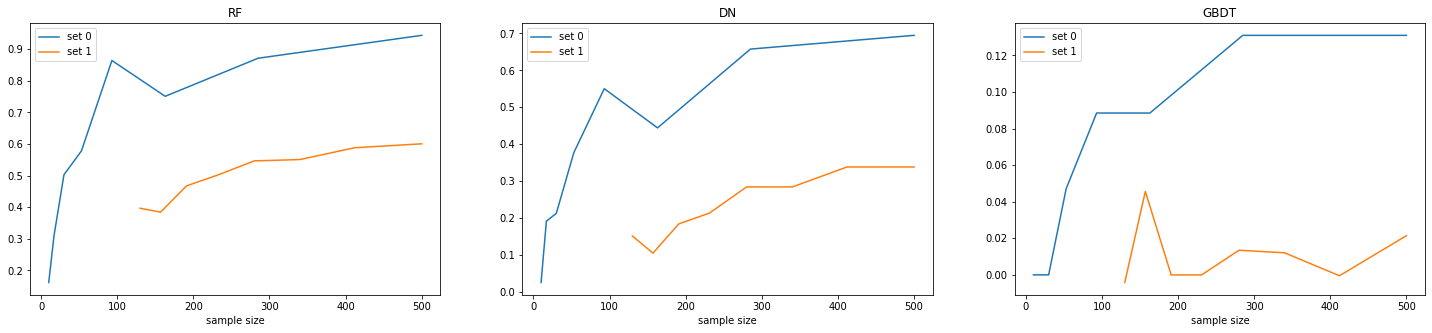

In [101]:
fig,axs = plt.subplots(1,len(new_dict['cohen_kappa']), figsize = (25,5))# len(new_dict['cohen_kappa']['RF'])
meths = list(new_dict['cohen_kappa'].keys())
[[pd.DataFrame(new_dict['cohen_kappa'][meth][j] ).T.plot(ax = axs[i], label = 'set %s'%str(j)) for i,meth in enumerate(meths)] for j in range(len(new_dict['cohen_kappa']['RF']))]
[ax.set_xlabel('sample size') for ax in axs]
[axs[i].set_title(meth) for i,meth in enumerate(meths)]
[ax.legend([ 'set %s'%str(i) for i  in range(len(new_dict['cohen_kappa']['RF'] ))]) for ax in axs]

In [ ]:
np.save('test_perf_try.npy',test_perf)

In [ ]:
dataset_index

In [ ]:
dataset_indices_max

In [44]:
results_different_datasets = {meth: np.vstack([pd.DataFrame(test_perf[meth][i]).mean(0).values for i in range(len(test_perf[meth]))])  for meth in test_perf.keys()}

In [46]:
import matplotlib.pyplot as plt

[Text(0.5, 0, 'sample size index'),
 Text(0.5, 0, 'sample size index'),
 Text(0.5, 0, 'sample size index')]

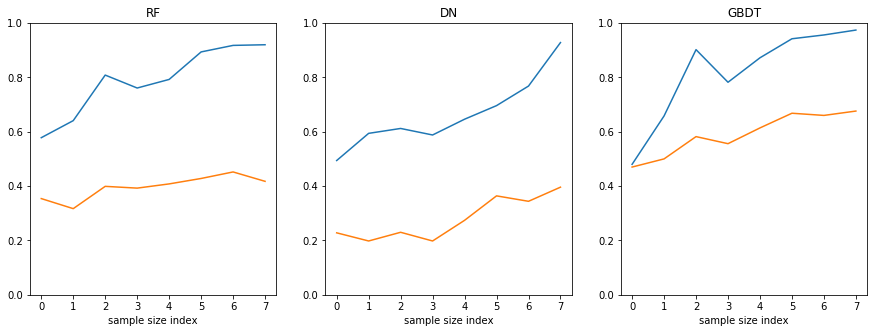

In [55]:
fig, axs = plt.subplots(1, len(results_different_datasets), figsize = (5*len(results_different_datasets),5))
keys_ord = list(results_different_datasets.keys())
[axs[i].plot(results_different_datasets[meth].T) for i, meth in enumerate(keys_ord)]
[ax.set_ylim([0,1]) for ax in axs]
[axs[i].set_title(meth) for i,meth in enumerate(keys_ord)]
[axs[i].set_xlabel('sample size index') for i,meth in enumerate(keys_ord)]

In [ ]:
np.save(r'metrics/test_perf_try.npy',test_perf)

In [ ]:
import pandas as pd

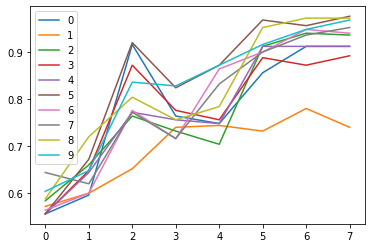

In [34]:
pd.DataFrame(test_perf['RF'][0]).T.plot()

In [14]:
model = classifiers[model_name]
varCVmodel = varCV[model_name]
parameters = create_parameters(model_name, varargin, p)
clf = RandomizedSearchCV(
    model,
    parameters,
    n_jobs=varCVmodel["n_jobs"],
    cv=[(train_indices, val_indices)],
    verbose=varCVmodel["verbose"],scoring="accuracy"
)
clf.fit(X, y)

Fitting 1 folds for each of 0 candidates, totalling 0 fits


ValueError: No fits were performed. Was the CV iterator empty? Were there no candidates?

In [15]:
clf

RandomizedSearchCV(cv=[(array([  0,   2,   3,   4,   5,   6,   7,   8,  10,  15,  16,  17,  18,
        21,  22,  23,  24,  25,  28,  29,  30,  34,  35,  36,  38,  39,
        42,  44,  45,  49,  51,  52,  54,  56,  57,  59,  67,  68,  71,
        72,  73,  75,  76,  77,  80,  81,  83,  86,  87,  89,  91,  92,
        96,  97,  98, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115,
       117, 118, 120, 122, 124, 125, 126, 127, 129, 131, 132, 133, 138,
       139, 142, 148, 149, 152, 153, 154, 155, 157, 158, 159, 160, 161,
       162, 167, 171, 172, 17...
       965, 966, 970, 972, 975, 976, 977, 979, 980, 981, 982, 985, 988,
       989, 991, 994, 995, 997, 998]),
                        [12, 13, 20, 26, 27, 32, 33, 37, 43, 46, 47, 53, 58, 60,
                         61, 62, 65, 66, 74, 78, 79, 82, 84, 88, 90, 99, 100,
                         101, 111, 119, ...])],
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [T

In [16]:
parameters

{'max_features': [36, 6, 9, 12, 24],
 'n_estimators': [],
 'criterion': ['gini'],
 'max_depth': [2, 10],
 'bootstrap': [True]}

In [17]:
varargin

{'DN': {'n_d': [8, 9],
  'n_a': [8],
  'gamma': [1.3],
  'n_shared': [5],
  'momentum': [0.01],
  'lambda_sparse': [0.1],
  'n_steps': [3]},
 'GBDT': {'subsample': [0.7],
  'alpha': [0.2],
  'lambda': [0.2],
  'colsample_bynode': [0.5],
  'sampling_method': ['uniform'],
  'gamma': [0.3],
  'eta': [0.1, 0.2]},
 'RF': {'n_estimators': [],
  'criterion': ['gini'],
  'max_depth': [2, 10],
  'bootstrap': [True]}}